# Explore

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi

In [4]:
import QLEAuxV2_pub as qa

import importlib
importlib.reload(qa)

<module 'QLEAuxV2_pub' from '/home/jupyter-tatpong@kku.ac.th/Y2025/QIS/QLEAuxV2_pub.py'>

In [5]:
import random

# Original Grover

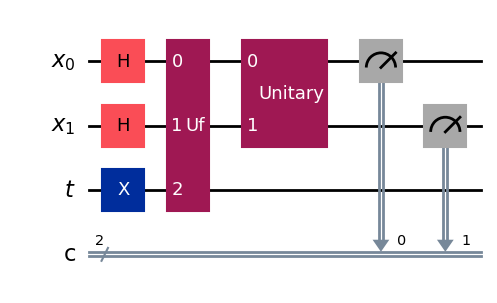

In [8]:
Ufz = qa.make_TMZ(TruthModels=("01", ), KBname='Uf', theta=np.pi)

x_qubit = QuantumRegister(2,'x')
t_qubit = QuantumRegister(1,'t')

cr = ClassicalRegister(2, 'c')

qc = QuantumCircuit(x_qubit, t_qubit, cr)


# Put input into superposition
qc.h([0, 1])

# y
qc.x(2)
# qc.h(2)

# Uf: f(x) @ y
qc.append(Ufz,[0,1,2])

# Inversion around mean
m = 4
A = 1/m * np.ones((m, m))
B = 2 * A - np.identity(m)
Bgate = qi.Operator(B)
Bgate.label = "2A - I"
qc.append(Bgate, [0,1])

qc.measure(x_qubit, cr)

# qc.h(2)
qc.draw('mpl')


{'01': 1024}


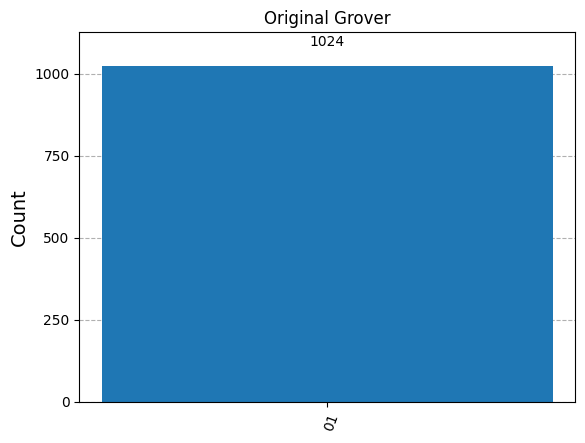

In [9]:

simulator = AerSimulator()
qc = transpile(qc, simulator)
job = simulator.run(qc)

result = job.result()

counts = result.get_counts(qc)

print(counts)
plot_histogram(counts, title='Original Grover')

## Experiment

### Single winner

In [10]:
TestCases = ["00", "01", "10", "11"]

Results = {}
for i, tc in enumerate(TestCases):

    Ufz = qa.make_TMZ(TruthModels=(tc, ), KBname='Uf', theta=np.pi)
    
    x_qubit = QuantumRegister(2,'x')
    t_qubit = QuantumRegister(1,'t')
    
    cr = ClassicalRegister(2, 'c')
    
    qc = QuantumCircuit(x_qubit, t_qubit, cr)
    
    
    # Put input into superposition
    qc.h([0, 1])
    
    # y
    qc.x(2)
    # qc.h(2)
    
    # Uf: f(x) @ y
    qc.append(Ufz,[0,1,2])
    
    # Inversion around mean
    m = 4
    A = 1/m * np.ones((m, m))
    B = 2 * A - np.identity(m)
    Bgate = qi.Operator(B)
    Bgate.label = "2A - I"
    qc.append(Bgate, [0,1])
    
    qc.measure(x_qubit, cr)

    simulator = AerSimulator()
    qc = transpile(qc, simulator)

    Results[tc] = {}
    for irep in range(40):
        job = simulator.run(qc)        
        result = job.result()
        
        counts = result.get_counts(qc)
        
        for k in counts:
            if k in Results[tc]:
                Results[tc][k].append(counts[k])
            else:
                Results[tc][k] = [counts[k]]


In [11]:
Results.keys()

dict_keys(['00', '01', '10', '11'])

In [12]:
list(Results['01'].keys()).sort()

In [13]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=19)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=19)    # fontsize of the y tick labels
plt.rc('legend', fontsize=15)    # fontsize of the legend

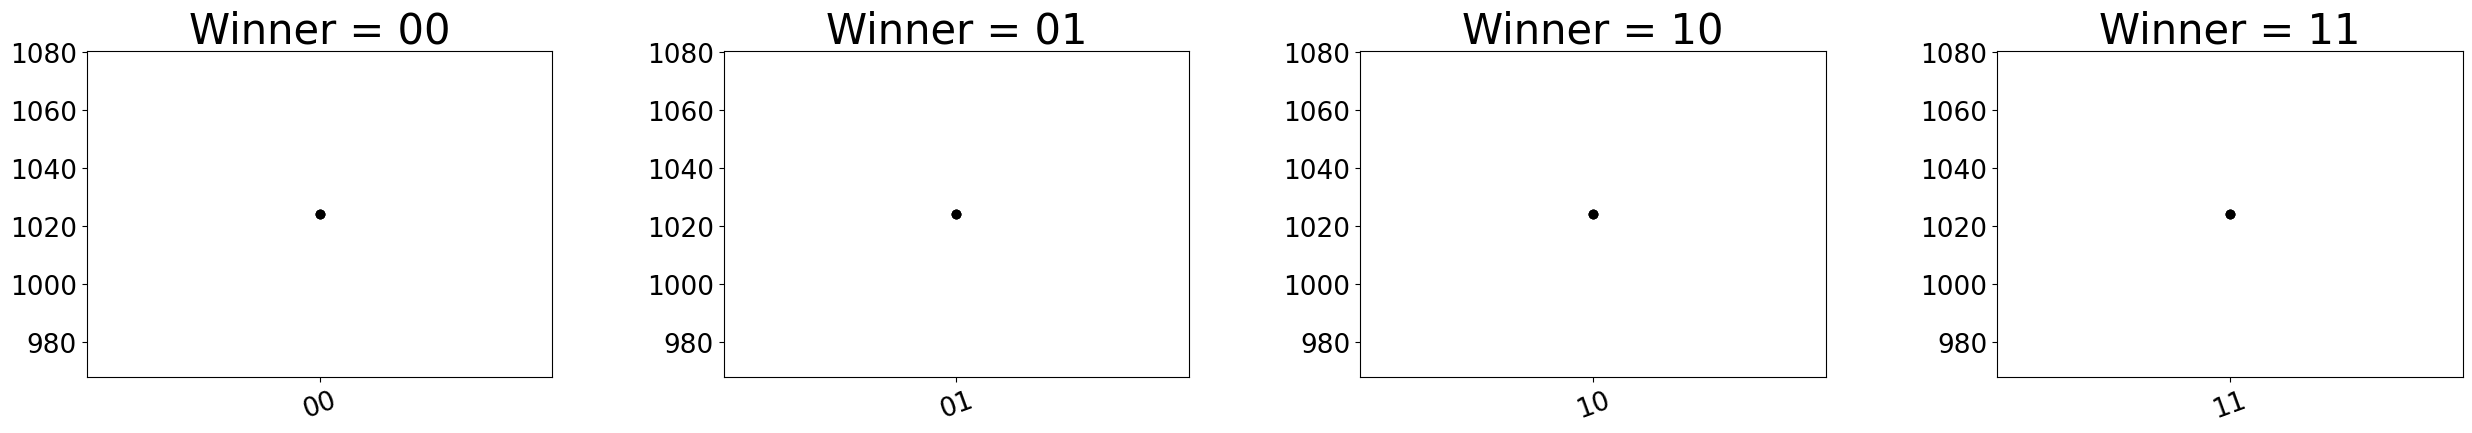

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.tight_layout(rect=[0.1, 0.1, 4, 1], h_pad=4, w_pad=4)

for i,tc in enumerate(TestCases):
    observ = list(Results[tc].keys())
    observ.sort()

    for j,o in enumerate(observ):
        cmax =  np.mean(Results[tc][o])
        cmean = np.mean(Results[tc][o])
        cmin =  np.min(Results[tc][o])
    
        plt.subplot(1, 4, i+1)
        plt.plot([j, j, j], [cmax, cmean, cmin], 'ko-')

    plt.title(f'Winner = {tc}')    
    plt.xticks(range(len(observ)), observ, rotation=20)

# end for





### Two winners

In [15]:
TestCases = [("00", "01"), ("00", "10"), ("00", "11"),
             ("01", "10"), ("01","11"), ("10", "11")]

Results = {}
for i, tc in enumerate(TestCases):

    Ufz = qa.make_TMZ(TruthModels=(tc[0], tc[1]), KBname='Uf', theta=np.pi)
    
    x_qubit = QuantumRegister(2,'x')
    t_qubit = QuantumRegister(1,'t')
    
    cr = ClassicalRegister(2, 'c')
    
    qc = QuantumCircuit(x_qubit, t_qubit, cr)
    
    
    # Put input into superposition
    qc.h([0, 1])
    
    # y
    qc.x(2)
    # qc.h(2)
    
    # Uf: f(x) @ y
    qc.append(Ufz,[0,1,2])
    
    # Inversion around mean
    m = 4
    A = 1/m * np.ones((m, m))
    B = 2 * A - np.identity(m)
    Bgate = qi.Operator(B)
    Bgate.label = "2A - I"
    qc.append(Bgate, [0,1])
    
    qc.measure(x_qubit, cr)

    simulator = AerSimulator()
    qc = transpile(qc, simulator)

    Results[tc] = {}
    for irep in range(40):
        job = simulator.run(qc)        
        result = job.result()
        
        counts = result.get_counts(qc)
        
        for k in counts:
            if k in Results[tc]:
                Results[tc][k].append(counts[k])
            else:
                Results[tc][k] = [counts[k]]


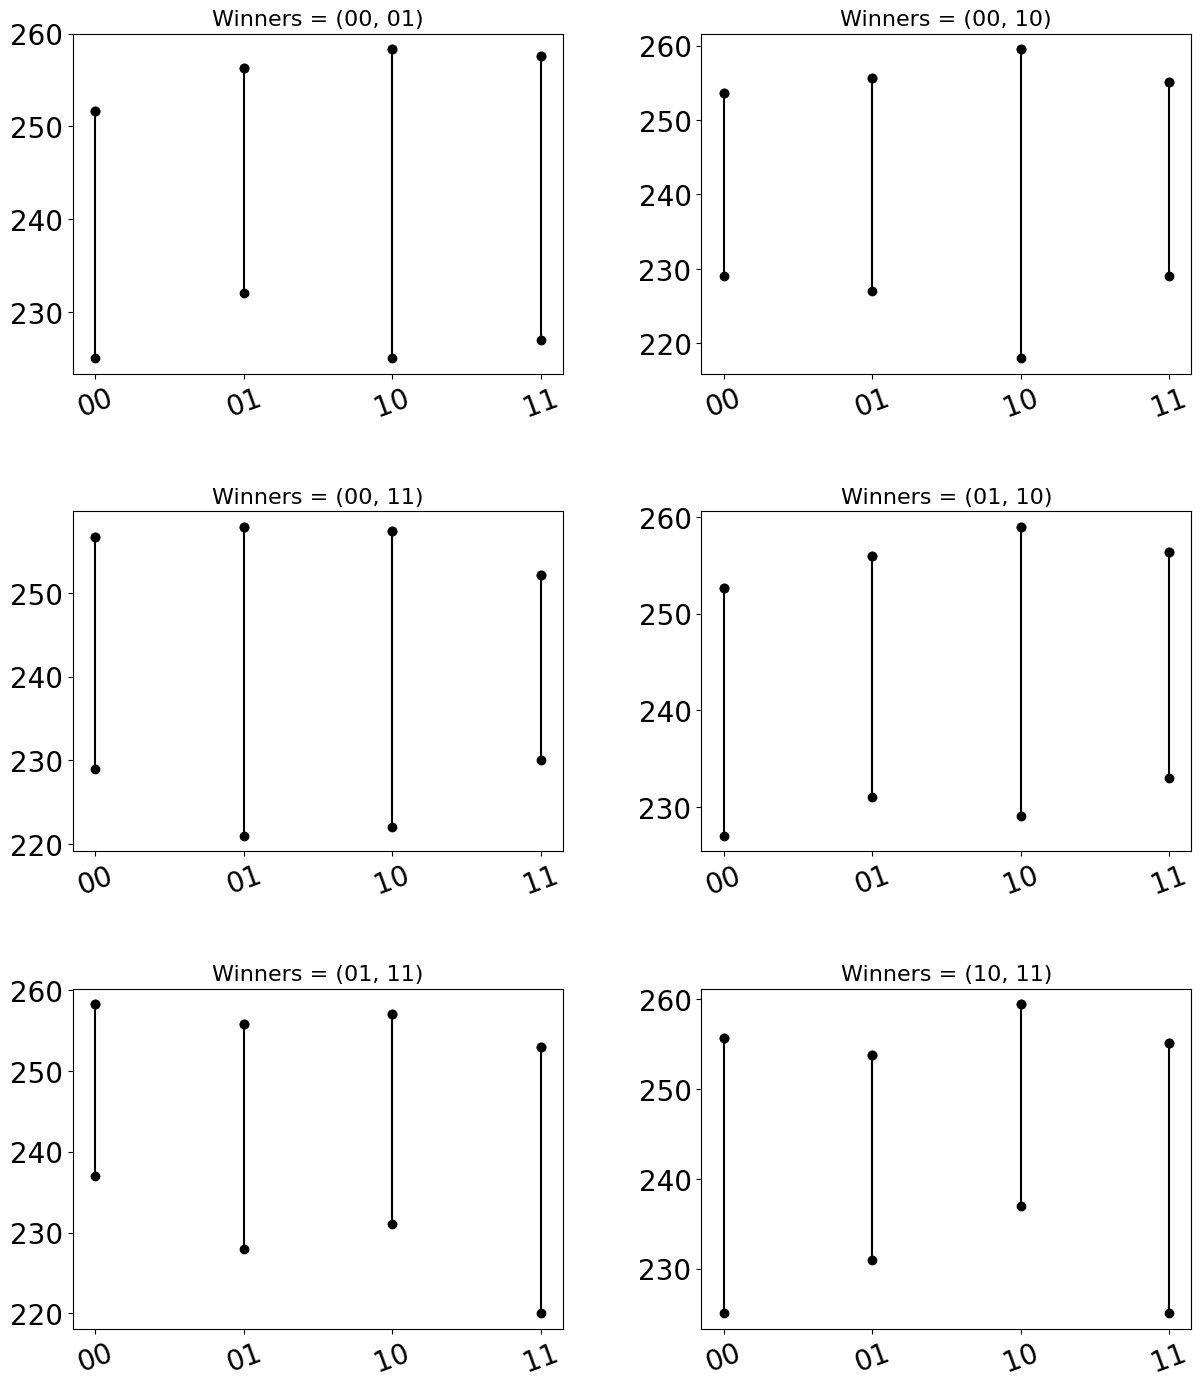

In [16]:
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the y tick labels
plt.rc('legend', fontsize=15)    # fontsize of the legend

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.tight_layout(rect=[0.1, 0.1, 2, 3], h_pad=4, w_pad=4)

for i,tc in enumerate(TestCases):
    observ = list(Results[tc].keys())
    observ.sort()

    for j,o in enumerate(observ):
        cmax =  np.mean(Results[tc][o])
        cmean = np.mean(Results[tc][o])
        cmin =  np.min(Results[tc][o])
    
        plt.subplot(3, 2, i+1)
        plt.plot([j, j, j], [cmax, cmean, cmin], 'ko-')

    plt.title(f'Winners = ({tc[0]}, {tc[1]})')    
    plt.xticks(range(len(observ)), observ, rotation=20)

# end for





Notice that original Grover algorithm cannot work for 2 winners out of 4 ($\lambda = 2/4$).

There is no minority!

Inversion about mean amplifies the amplitudes of minority.

# Eigenmarking

Add more qubits to "minoritize" even the all-winner states.

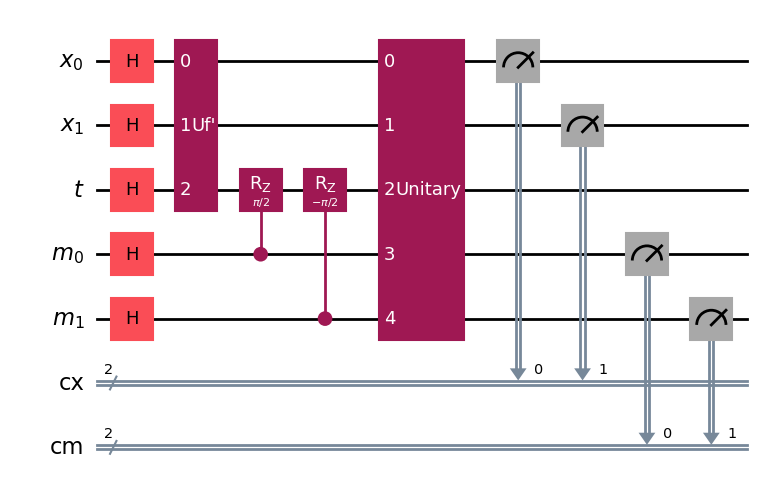

In [18]:
Ufz = qa.make_TMZ(TruthModels=("00", "01", "10", "11"), KBname="Uf'", theta=np.pi/2)

x_qubit = QuantumRegister(2,'x')
t_qubit = QuantumRegister(1,'t')
m_qubit = QuantumRegister(2,'m')

crx = ClassicalRegister(2, 'cx')
crm = ClassicalRegister(2, 'cm')

qc = QuantumCircuit(x_qubit, t_qubit, m_qubit, crx, crm)

# Put input into superposition
# [3,4] is the extra qubit
qc.h([0, 1, 3, 4])

# y
qc.h(2)

# Uf: f(x) @ y
qc.append(Ufz,[0,1,2])

# [m0] @ y
qc.mcrz(np.pi/2, 3, 2)

# [m1] @ y
qc.mcrz(-np.pi/2, 4, 2)

# Inversion around mean
m = 32
A = 1/m * np.ones((m, m))
B = 2 * A - np.identity(m)
Bgate = qi.Operator(B)

qc.append(Bgate, [0,1,2,3,4])

qc.measure(x_qubit, crx)
qc.measure(m_qubit, crm)

qc.draw('mpl')


{'10 10': 5, '11 10': 54, '10 01': 4, '01 01': 145, '10 11': 6, '00 11': 56, '01 11': 135, '11 01': 56, '10 00': 4, '01 10': 157, '01 00': 153, '11 11': 49, '00 01': 51, '00 00': 48, '00 10': 57, '11 00': 44}


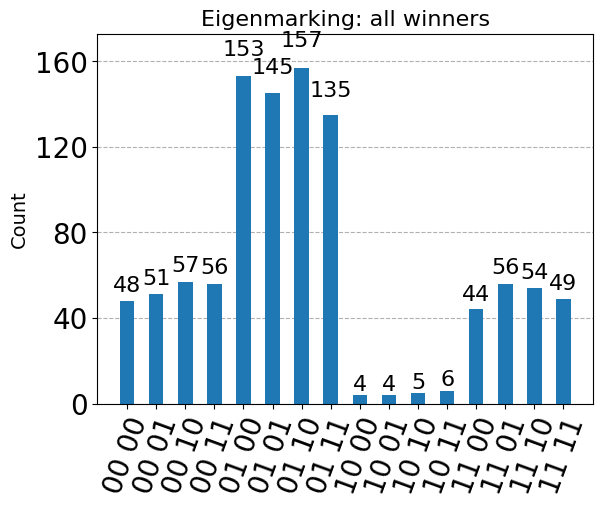

In [19]:
simulator = AerSimulator()
qc = transpile(qc, simulator)
job = simulator.run(qc)

result = job.result()

counts = result.get_counts(qc)

print(counts)
plot_histogram(counts, title='Eigenmarking: all winners')

It is apparently working all answer states (```00```, ```01```, ```10```, ```11```) with tag ```01``` becomes minority and their amplitudes get amplified.

## No winner

In [22]:
Ufz_W0 = qa.make_TMZ(TruthModels=("00", ), KBname='Uf', theta=0)

TestCases = {'No winner': Ufz_W0}

Results = {}
for tc in TestCases.keys():

    Ufz = TestCases[tc]
 
    x_qubit = QuantumRegister(2,'x')
    t_qubit = QuantumRegister(1,'t')
    m_qubit = QuantumRegister(2,'m')
    
    crx = ClassicalRegister(2, 'cx')
    crm = ClassicalRegister(2, 'cm')
    
    qc = QuantumCircuit(x_qubit, t_qubit, m_qubit, crx, crm)
    
    # Put input into superposition
    # [3,4] is the extra qubit
    qc.h([0, 1, 3, 4])
    
    # y
    qc.h(2)
    
    # Uf: f(x) @ y
    qc.append(Ufz,[0,1,2])
    
    # [m0] @ y
    qc.mcrz(np.pi/2, 3, 2)
    
    # [m1] @ y
    qc.mcrz(-np.pi/2, 4, 2)
    
    # Inversion around mean
    m = 32
    A = 1/m * np.ones((m, m))
    B = 2 * A - np.identity(m)
    Bgate = qi.Operator(B)
    
    qc.append(Bgate, [0,1,2,3,4])
    
    qc.measure(x_qubit, crx)
    qc.measure(m_qubit, crm)
    
    simulator = AerSimulator()
    qc = transpile(qc, simulator)

    # Acquire results
    Results[tc] = []
    for irep in range(40):
        job = simulator.run(qc)        
        result = job.result()
        
        counts = result.get_counts(qc)
        Results[tc].append(counts)


# np.save("EigenMark_win0.npy", Results)                


### After run

In [23]:
# Results = np.load("EigenMark_win0.npy", allow_pickle=True).tolist()

In [24]:
TestCases = list(Results.keys())
TCs = TestCases
TCs

['No winner']

In [25]:
print(type(Results['No winner']))
print(len(Results['No winner']))

<class 'list'>
40


In [26]:
Results['No winner'][0].keys()

dict_keys(['00 00', '00 01', '11 00', '11 01', '01 00', '01 10', '10 00', '01 11', '00 11', '10 11', '11 11', '10 01', '01 01', '11 10', '00 10', '10 10'])

In [27]:
# Test
qa.collectByState(Results['No winner'][:2])

{'00 00': [41, 29],
 '00 01': [26, 36],
 '11 00': [36, 34],
 '11 01': [27, 28],
 '01 00': [72, 98],
 '01 10': [119, 107],
 '10 00': [89, 85],
 '01 11': [103, 97],
 '00 11': [28, 34],
 '10 11': [93, 90],
 '11 11': [33, 26],
 '10 01': [92, 110],
 '01 01': [95, 99],
 '11 10': [40, 41],
 '00 10': [38, 22],
 '10 10': [92, 88]}

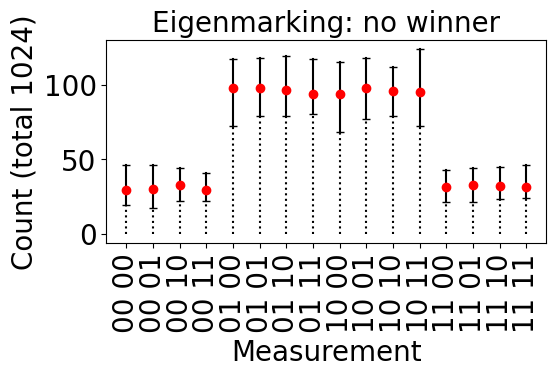

In [28]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the y tick labels
plt.rc('legend', fontsize=15)    # fontsize of the legend

nr, nc = 1, 1

fig, axes = plt.subplots(nrows=nr, ncols=nc)
fig.tight_layout(rect=[0.1, 0.1, nc, nr*0.75], h_pad=5, w_pad=2)

for i,tc in enumerate(TCs):

    StateCount = qa.collectByState(Results[tc])
    observ = list(StateCount.keys())
    observ.sort()

    plotmatx = np.zeros((0,4))
    plotmaty = np.zeros((0,4))
    for j,o in enumerate(observ):
        cmax =  np.max(StateCount[o])
        cmedian = np.median(StateCount[o])
        cmin =  np.min(StateCount[o])

        # Single plot
        plt.subplot(nr, nc, i+1)
        plt.plot([j, j], [0, cmin], 'k:')
        plt.plot([j, j, j], [cmin, cmedian, cmax], 'k_-')
        plt.plot([j], [cmedian], 'ro')
        
    plt.title(f'Eigenmarking: {tc[0].lower() + tc[1:]}')    
    plt.xticks(range(len(observ)), observ, rotation=90)
    plt.ylabel('Count (total 1024)')
    plt.xlabel('Measurement')

    # break
# end for


The detection of a no winner case can rely on a complementary group (tag ```10```).

## All winners

In [30]:
Ufz_W4 = qa.make_TMZ(TruthModels=("00", "01", "10", "11"), KBname='Uf', theta=np.pi/2)

TestCases = {'All winners': Ufz_W4}

Results = {}
for tc in TestCases.keys():

    Ufz = TestCases[tc]
 
    x_qubit = QuantumRegister(2,'x')
    t_qubit = QuantumRegister(1,'t')
    m_qubit = QuantumRegister(2,'m')
    
    crx = ClassicalRegister(2, 'cx')
    crm = ClassicalRegister(2, 'cm')
    
    qc = QuantumCircuit(x_qubit, t_qubit, m_qubit, crx, crm)
    
    # Put input into superposition
    # [3,4] is the extra qubit
    qc.h([0, 1, 3, 4])
    
    # y
    qc.h(2)
    
    # Uf: f(x) @ y
    qc.append(Ufz,[0,1,2])
    
    # [m0] @ y
    qc.mcrz(np.pi/2, 3, 2)
    
    # [m1] @ y
    qc.mcrz(-np.pi/2, 4, 2)
    
    # Inversion around mean
    m = 32
    A = 1/m * np.ones((m, m))
    B = 2 * A - np.identity(m)
    Bgate = qi.Operator(B)
    
    qc.append(Bgate, [0,1,2,3,4])
    
    qc.measure(x_qubit, crx)
    qc.measure(m_qubit, crm)
    
    simulator = AerSimulator()
    qc = transpile(qc, simulator)

    # Acquire results
    Results[tc] = []
    for irep in range(40):
        job = simulator.run(qc)        
        result = job.result()
        
        counts = result.get_counts(qc)
        Results[tc].append(counts)

# np.save("EigenMark_win4.npy", Results)                


### After run

In [32]:
# Results = np.load("EigenMark_win4.npy", allow_pickle=True).tolist()

In [33]:
TestCases = list(Results.keys())
TCs = TestCases
TCs

['All winners']

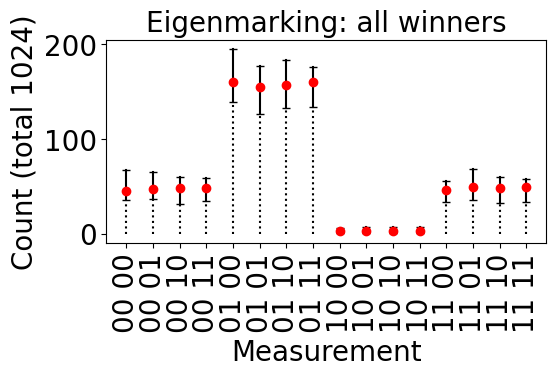

In [34]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the y tick labels
plt.rc('legend', fontsize=15)    # fontsize of the legend

nr, nc = 1, 1

fig, axes = plt.subplots(nrows=nr, ncols=nc)
fig.tight_layout(rect=[0.1, 0.1, nc, nr*0.75], h_pad=5, w_pad=2)

for i,tc in enumerate(TCs):

    StateCount = qa.collectByState(Results[tc])
    observ = list(StateCount.keys())
    observ.sort()

    plotmatx = np.zeros((0,4))
    plotmaty = np.zeros((0,4))
    for j,o in enumerate(observ):
        cmax =  np.max(StateCount[o])
        cmedian = np.median(StateCount[o])
        cmin =  np.min(StateCount[o])

        # Single plot
        plt.subplot(nr, nc, i+1)
        plt.plot([j, j], [0, cmin], 'k:')
        plt.plot([j, j, j], [cmin, cmedian, cmax], 'k_-')
        plt.plot([j], [cmedian], 'ro')
        
    plt.title(f'Eigenmarking: {tc[0].lower() + tc[1:]}')    
    plt.xticks(range(len(observ)), observ, rotation=90)
    plt.ylabel('Count (total 1024)')
    plt.xlabel('Measurement')

    # break
# end for


## One winner

In [37]:
Ufz_1W0 = qa.make_TMZ(TruthModels=("00", ), KBname='Uf', theta=np.pi/2)
Ufz_1W1 = qa.make_TMZ(TruthModels=("01", ), KBname='Uf', theta=np.pi/2)
Ufz_1W2 = qa.make_TMZ(TruthModels=("10", ), KBname='Uf', theta=np.pi/2)
Ufz_1W3 = qa.make_TMZ(TruthModels=("11", ), KBname='Uf', theta=np.pi/2)


TestCases = {'One winner: 00': Ufz_1W0,
             'One winner: 01': Ufz_1W1,
             'One winner: 10': Ufz_1W2,
             'One winner: 11': Ufz_1W3}

Results = {}
for tc in TestCases.keys():

    Ufz = TestCases[tc]
 
    x_qubit = QuantumRegister(2,'x')
    t_qubit = QuantumRegister(1,'t')
    m_qubit = QuantumRegister(2,'m')
    
    crx = ClassicalRegister(2, 'cx')
    crm = ClassicalRegister(2, 'cm')
    
    qc = QuantumCircuit(x_qubit, t_qubit, m_qubit, crx, crm)
    
    # Put input into superposition
    # [3,4] is the extra qubit
    qc.h([0, 1, 3, 4])
    
    # y
    qc.h(2)
    
    # Uf: f(x) @ y
    qc.append(Ufz,[0,1,2])
    
    # [m0] @ y
    qc.mcrz(np.pi/2, 3, 2)
    
    # [m1] @ y
    qc.mcrz(-np.pi/2, 4, 2)
    
    # Inversion around mean
    m = 32
    A = 1/m * np.ones((m, m))
    B = 2 * A - np.identity(m)
    Bgate = qi.Operator(B)
    
    qc.append(Bgate, [0,1,2,3,4])
    
    qc.measure(x_qubit, crx)
    qc.measure(m_qubit, crm)
    
    simulator = AerSimulator()
    qc = transpile(qc, simulator)

    # Acquire results
    Results[tc] = []
    for irep in range(40):
        job = simulator.run(qc)        
        result = job.result()
        
        counts = result.get_counts(qc)
        Results[tc].append(counts)

# np.save("EigenMark_win1.npy", Results)                


### After run

In [39]:
# Results = np.load("EigenMark_win1.npy", allow_pickle=True).tolist()

In [40]:
Results['One winner: 01'][0]

{'00 00': 11,
 '00 10': 10,
 '11 00': 15,
 '10 11': 97,
 '00 11': 15,
 '01 11': 80,
 '00 01': 96,
 '11 11': 21,
 '11 01': 95,
 '10 00': 66,
 '01 10': 78,
 '01 00': 76,
 '10 10': 71,
 '10 01': 60,
 '01 01': 218,
 '11 10': 15}

In [41]:
TestCases = list(Results.keys())
# TCs = TestCases
print(TestCases)
# TCs = random.sample(TestCases, 2)
# TCs.sort()
TCs = ['One winner: 01', 'One winner: 11']
TCs

['One winner: 00', 'One winner: 01', 'One winner: 10', 'One winner: 11']


['One winner: 01', 'One winner: 11']

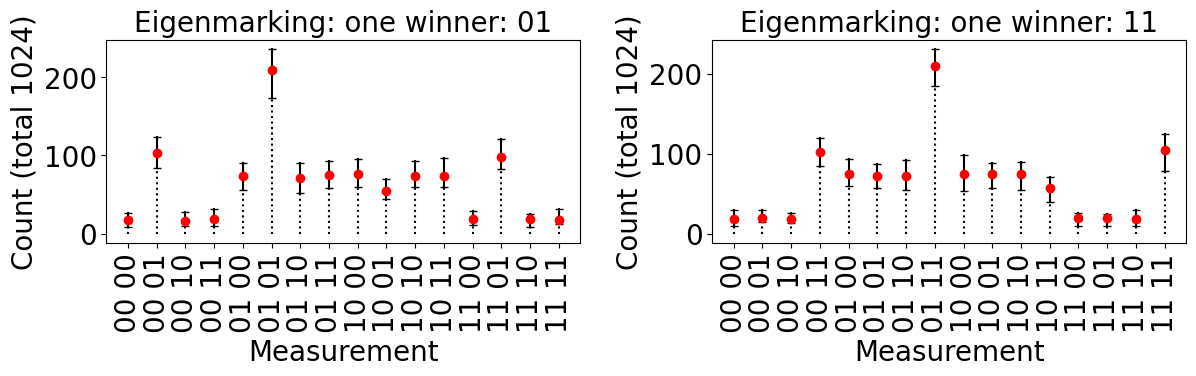

In [42]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the y tick labels
plt.rc('legend', fontsize=15)    # fontsize of the legend

nr, nc = 1, 2

fig, axes = plt.subplots(nrows=nr, ncols=nc)
fig.tight_layout(rect=[0.1, 0.1, nc, nr*0.75], h_pad=5, w_pad=2)

for i,tc in enumerate(TCs):

    StateCount = qa.collectByState(Results[tc])
    observ = list(StateCount.keys())
    observ.sort()

    plotmatx = np.zeros((0,4))
    plotmaty = np.zeros((0,4))
    for j,o in enumerate(observ):
        cmax =  np.max(StateCount[o])
        cmedian = np.median(StateCount[o])
        cmin =  np.min(StateCount[o])

        # Single plot
        plt.subplot(nr, nc, i+1)
        plt.plot([j, j], [0, cmin], 'k:')
        plt.plot([j, j, j], [cmin, cmedian, cmax], 'k_-')
        plt.plot([j], [cmedian], 'ro')
        
    plt.title(f'Eigenmarking: {tc[0].lower() + tc[1:]}')    
    plt.xticks(range(len(observ)), observ, rotation=90)
    plt.ylabel('Count (total 1024)')
    plt.xlabel('Measurement')

    # break
# end for



## Two winners

In [43]:
Ufz_2W01 = qa.make_TMZ(TruthModels=("00", "01"), KBname='Uf', theta=np.pi/2)
Ufz_2W02 = qa.make_TMZ(TruthModels=("00", "10"), KBname='Uf', theta=np.pi/2)
Ufz_2W03 = qa.make_TMZ(TruthModels=("00", "11"), KBname='Uf', theta=np.pi/2)

Ufz_2W12 = qa.make_TMZ(TruthModels=("01", "10"), KBname='Uf', theta=np.pi/2)
Ufz_2W13 = qa.make_TMZ(TruthModels=("01", "11"), KBname='Uf', theta=np.pi/2)

Ufz_2W23 = qa.make_TMZ(TruthModels=("10", "11"), KBname='Uf', theta=np.pi/2)


TestCases = {'Two winners: 00, 01': Ufz_2W01,
             'Two winners: 00, 10': Ufz_2W02,
             'Two winners: 00, 11': Ufz_2W03,
             'Two winners: 01, 10': Ufz_2W12,
             'Two winners: 01, 11': Ufz_2W13,
             'Two winners: 10, 11': Ufz_2W23}

Results = {}
for tc in TestCases.keys():

    Ufz = TestCases[tc]
 
    x_qubit = QuantumRegister(2,'x')
    t_qubit = QuantumRegister(1,'t')
    m_qubit = QuantumRegister(2,'m')
    
    crx = ClassicalRegister(2, 'cx')
    crm = ClassicalRegister(2, 'cm')
    
    qc = QuantumCircuit(x_qubit, t_qubit, m_qubit, crx, crm)
    
    # Put input into superposition
    # [3,4] is the extra qubit
    qc.h([0, 1, 3, 4])
    
    # y
    qc.h(2)
    
    # Uf: f(x) @ y
    qc.append(Ufz,[0,1,2])
    
    # [m0] @ y
    qc.mcrz(np.pi/2, 3, 2)
    
    # [m1] @ y
    qc.mcrz(-np.pi/2, 4, 2)
    
    # Inversion around mean
    m = 32
    A = 1/m * np.ones((m, m))
    B = 2 * A - np.identity(m)
    Bgate = qi.Operator(B)
    
    qc.append(Bgate, [0,1,2,3,4])
    
    qc.measure(x_qubit, crx)
    qc.measure(m_qubit, crm)
    
    simulator = AerSimulator()
    qc = transpile(qc, simulator)

    # Acquire results
    Results[tc] = []
    for irep in range(40):
        job = simulator.run(qc)        
        result = job.result()
        
        counts = result.get_counts(qc)
        Results[tc].append(counts)

# np.save("EigenMark_win2.npy", Results)                


### After run

In [44]:
# Results = np.load("EigenMark_win2.npy", allow_pickle=True).tolist()

In [45]:
TestCases = list(Results.keys())
# TCs = TestCases
print(TestCases)
# TCs = random.sample(TestCases, 2)
# TCs.sort()
TCs = ['Two winners: 00, 11', 'Two winners: 01, 10']
TCs

['Two winners: 00, 01', 'Two winners: 00, 10', 'Two winners: 00, 11', 'Two winners: 01, 10', 'Two winners: 01, 11', 'Two winners: 10, 11']


['Two winners: 00, 11', 'Two winners: 01, 10']

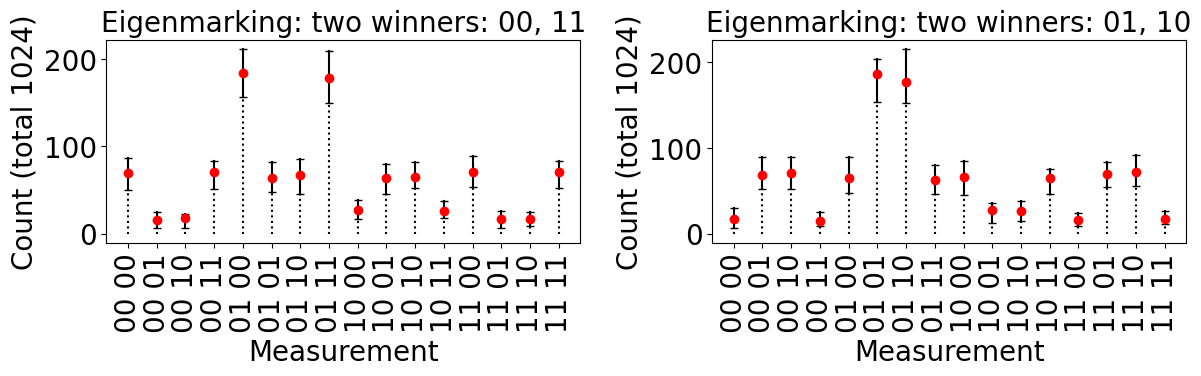

In [46]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the y tick labels
plt.rc('legend', fontsize=15)    # fontsize of the legend

nr, nc = 1, 2

fig, axes = plt.subplots(nrows=nr, ncols=nc)
fig.tight_layout(rect=[0.1, 0.1, nc, nr*0.75], h_pad=5, w_pad=2)

for i,tc in enumerate(TCs):

    StateCount = qa.collectByState(Results[tc])
    observ = list(StateCount.keys())
    observ.sort()

    plotmatx = np.zeros((0,4))
    plotmaty = np.zeros((0,4))
    for j,o in enumerate(observ):
        cmax =  np.max(StateCount[o])
        cmedian = np.median(StateCount[o])
        cmin =  np.min(StateCount[o])

        # Single plot
        plt.subplot(nr, nc, i+1)
        plt.plot([j, j], [0, cmin], 'k:')
        plt.plot([j, j, j], [cmin, cmedian, cmax], 'k_-')
        plt.plot([j], [cmedian], 'ro')
        
    plt.title(f'Eigenmarking: {tc[0].lower() + tc[1:]}')    
    plt.xticks(range(len(observ)), observ, rotation=90)
    plt.ylabel('Count (total 1024)')
    plt.xlabel('Measurement')

    # break
# end for



## Three winners

In [47]:
Ufz_3W012 = qa.make_TMZ(TruthModels=("00", "01", "10"), KBname='Uf', theta=np.pi/2)
Ufz_3W013 = qa.make_TMZ(TruthModels=("00", "01", "11"), KBname='Uf', theta=np.pi/2)
Ufz_3W023 = qa.make_TMZ(TruthModels=("00", "10", "11"), KBname='Uf', theta=np.pi/2)
Ufz_3W123 = qa.make_TMZ(TruthModels=("01", "10", "11"), KBname='Uf', theta=np.pi/2)


TestCases = {'Three winners: 00, 01, 10': Ufz_3W012,
             'Three winners: 00, 01, 11': Ufz_3W013,
             'Three winners: 00, 10, 11': Ufz_3W023,
             'Three winners: 01, 10, 11': Ufz_3W123}

Results = {}
for tc in TestCases.keys():

    Ufz = TestCases[tc]
 
    x_qubit = QuantumRegister(2,'x')
    t_qubit = QuantumRegister(1,'t')
    m_qubit = QuantumRegister(2,'m')
    
    crx = ClassicalRegister(2, 'cx')
    crm = ClassicalRegister(2, 'cm')
    
    qc = QuantumCircuit(x_qubit, t_qubit, m_qubit, crx, crm)
    
    # Put input into superposition
    # [3,4] is the extra qubit
    qc.h([0, 1, 3, 4])
    
    # y
    qc.h(2)
    
    # Uf: f(x) @ y
    qc.append(Ufz,[0,1,2])
    
    # [m0] @ y
    qc.mcrz(np.pi/2, 3, 2)
    
    # [m1] @ y
    qc.mcrz(-np.pi/2, 4, 2)
    
    # Inversion around mean
    m = 32
    A = 1/m * np.ones((m, m))
    B = 2 * A - np.identity(m)
    Bgate = qi.Operator(B)
    
    qc.append(Bgate, [0,1,2,3,4])
    
    qc.measure(x_qubit, crx)
    qc.measure(m_qubit, crm)
    
    simulator = AerSimulator()
    qc = transpile(qc, simulator)

    # Acquire results
    Results[tc] = []
    for irep in range(40):
        job = simulator.run(qc)        
        result = job.result()
        
        counts = result.get_counts(qc)
        Results[tc].append(counts)

# np.save("EigenMark_win3.npy", Results)                


### After run

In [48]:
# Results = np.load("EigenMark_win3.npy", allow_pickle=True).tolist()

In [49]:
TestCases = list(Results.keys())
# TCs = TestCases
print(TestCases)
# TCs = random.sample(TestCases, 2)
# TCs.sort()
TCs = ['Three winners: 00, 01, 10', 'Three winners: 00, 10, 11']
TCs

['Three winners: 00, 01, 10', 'Three winners: 00, 01, 11', 'Three winners: 00, 10, 11', 'Three winners: 01, 10, 11']


['Three winners: 00, 01, 10', 'Three winners: 00, 10, 11']

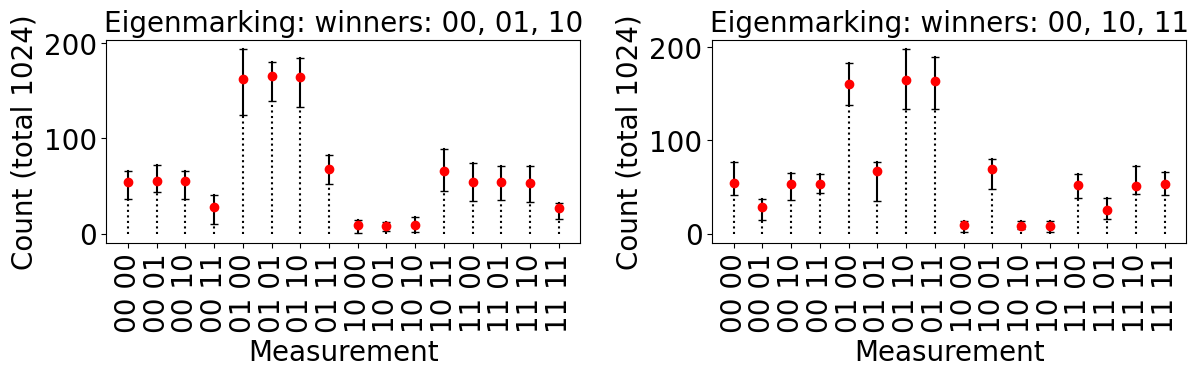

In [50]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the y tick labels
plt.rc('legend', fontsize=15)    # fontsize of the legend

nr, nc = 1, 2

fig, axes = plt.subplots(nrows=nr, ncols=nc)
fig.tight_layout(rect=[0.1, 0.1, nc, nr*0.75], h_pad=5, w_pad=2)

for i,tc in enumerate(TCs):

    StateCount = qa.collectByState(Results[tc])
    observ = list(StateCount.keys())
    observ.sort()

    plotmatx = np.zeros((0,4))
    plotmaty = np.zeros((0,4))
    for j,o in enumerate(observ):
        cmax =  np.max(StateCount[o])
        cmedian = np.median(StateCount[o])
        cmin =  np.min(StateCount[o])

        # Single plot
        plt.subplot(nr, nc, i+1)
        plt.plot([j, j], [0, cmin], 'k:')
        plt.plot([j, j, j], [cmin, cmedian, cmax], 'k_-')
        plt.plot([j], [cmedian], 'ro')
        
    # plt.title(f'Eigenmarking: {tc[0].lower() + tc[1:]}')    
    plt.title(f'Eigenmarking: {tc[6:]}')        
    plt.xticks(range(len(observ)), observ, rotation=90)
    plt.ylabel('Count (total 1024)')
    plt.xlabel('Measurement')

    # break
# end for



T. Katanyukul, Toward Entailment Checking: Explore Eigenmarking Search. 
2025 3rd International Conference on Advancement in Computation & Computer Technologies (InCACCT)
17-18 April, Chandigarh University, India
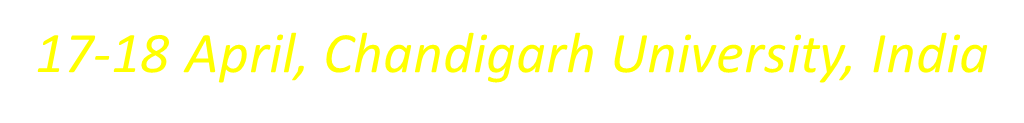
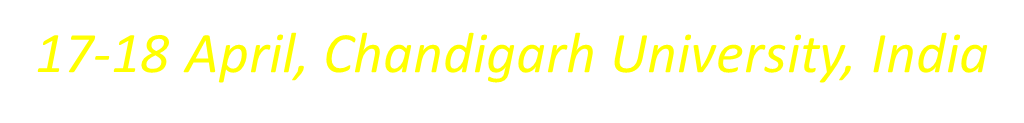
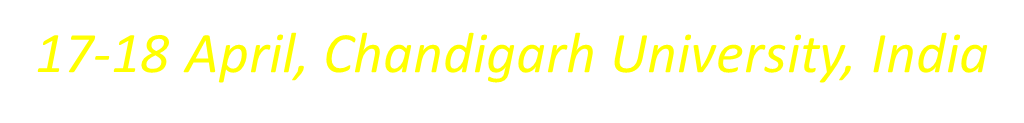
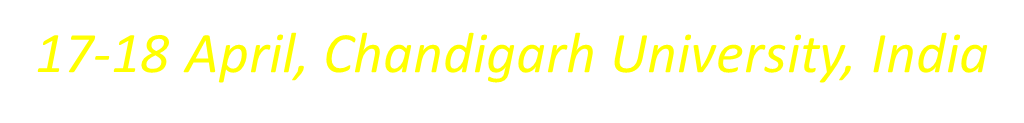

# End